In [ ]:
pip install nlplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 967 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 35.8 MB/s 


In [ ]:
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_twitter.csv')

# 全データ・#データサイエンティスト・#kaggleをそれぞれインスタンス化
npt = nlplot.NLPlot(df, target_col='hashtags')
npt_ds = nlplot.NLPlot(df.query('searched_for == "#データサイエンティスト"'), target_col='hashtags')
npt_kaggle = nlplot.NLPlot(df.query('searched_for == "#kaggle"'), target_col='hashtags')

In [ ]:
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語（データサイエンティスト・kaggle）をストップワードに指定
stopwords = npt.get_stopword(top_n=2, min_freq=0)

In [ ]:
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)

100%|██████████| 2713/2713 [00:00<00:00, 143956.01it/s]


In [ ]:
# #データサイエンティストのfigを取得
fig_unigram_ds = npt_ds.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)

100%|██████████| 1489/1489 [00:00<00:00, 155263.49it/s]


In [ ]:
# #kaggleのfigを取得
fig_unigram_kaggle = npt_kaggle.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)

100%|██████████| 1224/1224 [00:00<00:00, 144663.78it/s]


In [ ]:
# subplot
trace1 = fig_unigram_ds['data'][0]
trace2 = fig_unigram_kaggle['data'][0]

fig = make_subplots(rows=1, cols=2, subplot_titles=('#データサイエンティスト', '#kaggle'), shared_xaxes=False)
fig.update_xaxes(title_text='word count', row=1, col=1)
fig.update_xaxes(title_text='word count', row=1, col=2)

fig.update_layout(height=1100, width=1900, title_text='unigram #データサイエンティスト vs. #kaggle')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

plotly.offline.plot(fig, filename='unigram #データサイエンティストvs#kaggle.html', auto_open=False)

fig.show()

In [ ]:
fig_treemap = npt.treemap(
    title='Tree map',
    ngram=1,
    top_n=50,
    width=1300,
    height=600,
    stopwords=stopwords,
    verbose=False,
    save=False
)
fig_treemap.show()

In [ ]:
# 単語数の分布
fig_histgram = npt.word_distribution(
    title='word distribution',
    xaxis_label='count',
    yaxis_label='',
    width=1000,
    height=500,
    color=None,
    template='plotly',
    bins=None,
    save=False,
)
fig_histgram.show()

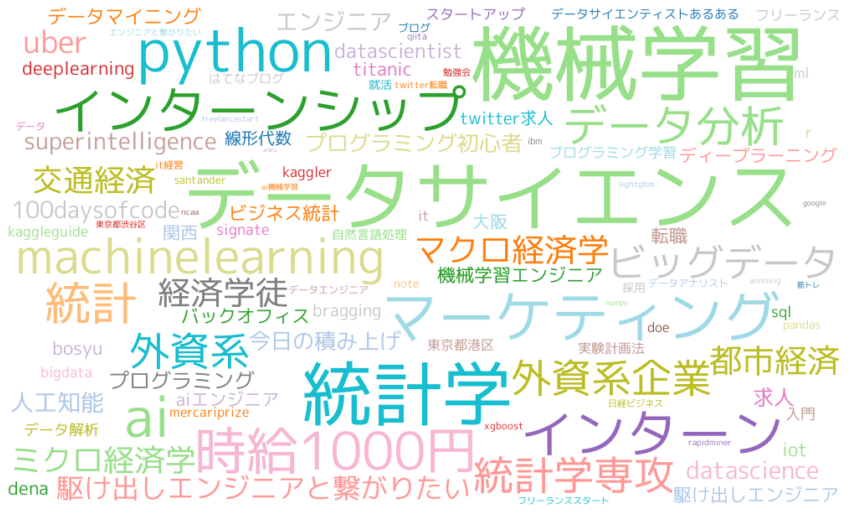

In [ ]:
fig_wc = npt.wordcloud(
    width=1000,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
    mask_file=None,
    save=False
)
plt.figure(figsize=(15, 25))
plt.imshow(fig_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# ビルド（データ件数によっては処理に時間を要します）
npt.build_graph(stopwords=stopwords, min_edge_frequency=25)

# ビルド後にノードとエッジの数が表示される。ノードの数が100前後になるようにするとネットワークが綺麗に描画できる
##node_size:63, edge_size:63

fig_co_network = npt.co_network(
    title='Co-occurrence network',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=700,
    save=False
)
iplot(fig_co_network)

node_size:24, edge_size:54


In [ ]:
display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

,id,id_code,adjacency_frequency,betweeness_centrality,clustering_coefficient,community
0,外資系,0,4,0.000000,1.0,3
1,python,1,4,0.081028,0.5,2
2,経済学徒,2,5,0.000000,1.0,1
3,求人,3,3,0.000000,1.0,0
4,統計学専攻,4,4,0.000000,1.0,3


(24, 6)

,source,target,edge_frequency,source_code,target_code
0,データサイエンス,統計学,225,8,10
1,インターン,データサイエンス,188,11,8
2,マーケティング,統計学,188,7,10
3,データサイエンス,マーケティング,188,8,7
4,マーケティング,時給1000円,187,7,14


(54, 5)

In [ ]:
fig_sunburst = npt.sunburst(
    title='sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=1000,
    height=800,
    save=False
)
fig_sunburst.show()
